# **DATA SCIENCE ITINERARY - IT ACADEMY**

# <center><b><u>Sprint 12. Advanced Machine Learning</u></b><center>

## **PIPELINES, GRID SEARCH AND TEXT MINING**

## **DATASET INFORMATION**

**CONTEXT**

Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

**CONTENT**

The water_potability.csv file contains water quality metrics for 3276 different water bodies.

 1. **pH value:**

PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

 2. **Hardness:**

Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

 3. **Solids (Total dissolved solids - TDS):**

Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

 4. **Chloramines:**

Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

 5. **Sulfate:**

Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

 6. **Conductivity:**

Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

7. **Organic_carbon:**

Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

8. **Trihalomethanes:**

THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

9. **Turbidity:**

The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

10. **Potability:**

Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.



In [299]:
# Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
import nltk
nltk.download('punkt')
import string
from nltk.tokenize import sent_tokenize, word_tokenize,regexp_tokenize, RegexpTokenizer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Special plot
color = sns.color_palette() 
import plotly.offline as py 
py.init_notebook_mode(connected=True) 
import plotly.graph_objs as go 
import plotly.tools as tls 
import plotly.express as px

[nltk_data] Downloading package punkt to /Users/adrianova/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/adrianova/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/adrianova/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/adrianova/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [300]:
# Potability Drinking Water CSV

drink_water = pd.read_csv('./Drinking_water.csv')
drink_water.drop(columns=['Unnamed: 0', 'Carcinogenics', 'medical_waste'], inplace = True) # delate variables without value and with all missing data
drink_water.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

## **EXPLORATION DATA ANALYSIS**

In [301]:
# Shape
drink_water.shape

(3276, 10)

In [302]:
# Information about the variables
drink_water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


### **MISSINGS**

In [303]:
# Missings 
drink_water.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [304]:
# Missing variables
drink_water[['ph','Sulfate','Trihalomethanes']].describe()

ph      Sulfate  Trihalomethanes
count  2785.000000  2495.000000      3114.000000
mean      7.080795   333.775777        66.396293
std       1.594320    41.416840        16.175008
min       0.000000   129.000000         0.738000
25%       6.093092   307.699498        55.844536
50%       7.036752   333.073546        66.622485
75%       8.062066   359.950170        77.337473
max      14.000000   481.030642       124.000000

WE CAN IMPUTE THE MEAN FOR THOSE VARIABLES THAT PRESENT MISSINGS, SINCE THE MEAN AND THE MEDIAN HAVE VERY SIMILAR VALUES.

In [305]:
# Mean imputation

features = ['ph','Sulfate','Trihalomethanes']

for item in features:
    drink_water[item].fillna(drink_water[item].mean(), inplace=True)

### **SCALING THE DATA**

SOME OF THE VARIABLES TAKE VERY HIGH VALUES IN COMPARISON WITH THE REST OF THEM. IN ORDER THE MODEL DOES NOT GIVE MORE IMPORTANCE TO THOSE VARIABLES WITH GREATER WEIGHT, WE WILL REDUCE THE SCALE FROM THE PROCESS **SCALING THE DATA**

In [306]:
# Standardization

data_to_scale = drink_water.drop(columns=['Potability'])

# Scaler
scaler = StandardScaler()

# Scale the data
scaler.fit(data_to_scale)

# Transform the data
drink_water_scaled = scaler.transform(data_to_scale)
drink_water_scaled = pd.DataFrame(drink_water_scaled, columns= data_to_scale.columns)

### **RANDOM FOREST MODEL**

In [307]:
# Random Forest Model

# Predictors
X = drink_water_scaled

# Target
y = drink_water['Potability']

# Split the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Shapes
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2620, 9), (656, 9), (2620,), (656,))

Test Accuracy: 0.689


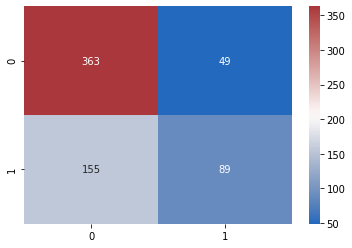

In [308]:
# Fit and predictions model

#Fit
random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)

# Predictions
y_pred = random_forest.predict(x_test)

# Evaluation model
print('Test Accuracy:', np.round(accuracy_score(y_test, y_pred),3))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, cmap =sns.color_palette("vlag", as_cmap=True), fmt = 'd'); plt.show()


THIS MODEL IS NOT VERY GOOD AT FIRST TIME, SO IT MAYBE NEEDS A PARAMETER ADJUSTMENT.


### **FEATURE IMPORTANCES**

WE WILL APPLY A RANDOM FOREST MODEL AND WE WANT TO SEE WHICH VARIABLES ARE IMPORTANT FOR OUR MODEL.

<AxesSubplot:>

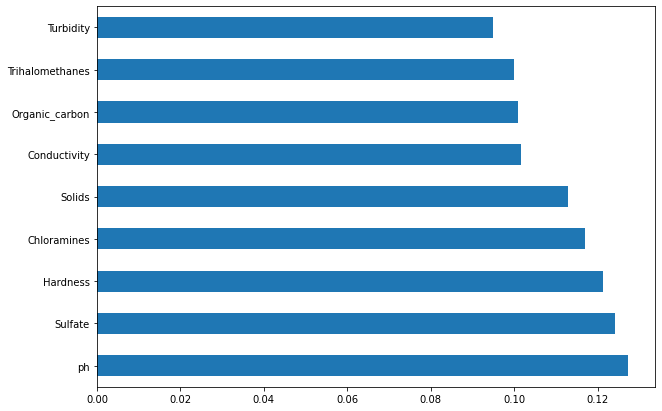

In [309]:
# Feature Importances
plt.figure(figsize = (10,7))
feat_importances = pd.Series(random_forest.feature_importances_, index= X.columns)
feat_importances.nlargest(9).plot(kind = 'barh')

ALL THE VARIABLES HAVE LITTLE IMPORTANCE IN EXPLAINING THE POTABILITY OF THE WATER. WE CAN CHOOSE THE FIRST 5 VARIABLES WITH THE HIGHEST WEIGHT AND LEAVE OUT THOSE VARIABLES WITH LESS THAN 0.1 OF IMPORTANCE.

+ Sulfate
+ PH
+ Hardness
+ Chloramines
+ Solids

Test Accuracy: 0.677


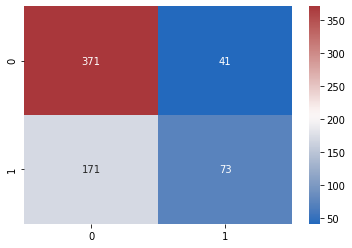

In [310]:

# Selecting the new columns for the model
new_x_train = x_train[['Sulfate', 'ph', 'Hardness', 'Chloramines', 'Solids']]
new_x_test = x_test[['Sulfate', 'ph', 'Hardness', 'Chloramines', 'Solids']]

# Fit the model
random_forest_feature_importances = RandomForestClassifier(max_depth=10, random_state=42)
random_forest_feature_importances.fit(new_x_train, y_train)

# Predictions
pred_test_feature_importances = random_forest_feature_importances.predict(new_x_test)

# Evaluation model
print('Test Accuracy:', np.round(accuracy_score(y_test, pred_test_feature_importances),3))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, pred_test_feature_importances)
sns.heatmap(conf_matrix, annot = True, cmap =sns.color_palette("vlag", as_cmap=True), fmt = 'd'); plt.show()


THE IMPROVEMENT OF THE MODEL HAS BEEN VERY VAGUE. AN IMPROVEMENT IN THE PARAMETERIZATION COULD HELP US TO OBTAIN A BETTER MODEL (GRID SEARCH).

## **EXERCISE 1**

**STATEMENT** Grab the data set you want and do a **pipeline** and a **gridsearch** using the Random Forest algorithm.

### **PIPELINE AND GRIDSEARCH**

EVERYTHING WE HAVE DONE CAN BE ENCAPSULATED IN A PIPELINE. THE OBJECTIVE OF THIS EXERCISE IS TO PUT ALL THE TRANSFORMATION, PARAMETERIZATION AND MODELING PROCESSES INTO A PIPELINE.

In [311]:
# Reload the data

potability_water = pd.read_csv('./Drinking_water.csv')
potability_water.drop(columns=['Unnamed: 0', 'Carcinogenics', 'medical_waste'], inplace = True)
potability_water.head(3)

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0

In [312]:
# Split the data

X = potability_water.drop(columns = ['Potability'])
y = potability_water['Potability']

# Split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

# Shape
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2620, 9), (2620,), (656, 9), (656,))

In [313]:
# Preprocessing data

drop_columns = ['Organic_carbon', 'Trihalomethanes', 'Conductivity','Turbidity']
imputation_columns = ['ph','Sulfate']

transformer = Pipeline(steps = [('imputation_mean', SimpleImputer(strategy= 'mean'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('drop_columns', 'drop', drop_columns),
        ('imputation', transformer['imputation_mean'], imputation_columns)
    ]
)

random_forest_pipe = Pipeline(
    steps = [
        ('preprocessor', preprocessor),
        ('scaled_data', StandardScaler()),
        ('classifier', RandomForestClassifier())
    ]
)

In [314]:

random_forest_pipe.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('drop_columns', 'drop',
                                                  ['Organic_carbon',
                                                   'Trihalomethanes',
                                                   'Conductivity',
                                                   'Turbidity']),
                                                 ('imputation', SimpleImputer(),
                                                  ['ph', 'Sulfate'])])),
                ('scaled_data', StandardScaler()),
                ('classifier', RandomForestClassifier())])

In [315]:
# Grid Search

# Parameters (Random Forest)
parameters = {'classifier__n_estimators':[10, 100, 200, 500], 'classifier__criterion': ['gini', 'entropy'], 'classifier__max_depth': [10,20,30,50]}

In [316]:
# Instantiate GridSearch Object
grid = GridSearchCV(random_forest_pipe, parameters, cv = 5)

In [317]:
# Fit the model
grid.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('drop_columns',
                                                                         'drop',
                                                                         ['Organic_carbon',
                                                                          'Trihalomethanes',
                                                                          'Conductivity',
                                                                          'Turbidity']),
                                                                        ('imputation',
                                                                         SimpleImputer(),
                                                                         ['ph',
                                                                          'Sulfate'])])),
                                       ('sca

In [318]:
print('Best parameters:', grid.best_params_)

Best parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': 10, 'classifier__n_estimators': 500}


THE INTERNAL CROSS-VALIDATION SCORES OBTAINED BY THESE PARAMETERS ARE:

In [319]:
print(f'Internal CV score: {grid.best_score_:.3f}')

Internal CV score: 0.639


In [320]:
# We can introspect the top grid search results as a pandas dataframe

cv_results = pd.DataFrame(grid.cv_results_)
cv_results = cv_results.sort_values('mean_test_score', ascending=False)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
3        1.111928      0.049056         0.064691        0.004330   
17       0.273296      0.020190         0.015497        0.001724   
18       0.521643      0.038601         0.027997        0.002481   
19       1.377627      0.057451         0.067602        0.004964   
1        0.290401      0.032079         0.020463        0.005584   

   param_classifier__criterion param_classifier__max_depth  \
3                         gini                          10   
17                     entropy                          10   
18                     entropy                          10   
19                     entropy                          10   
1                         gini                          10   

   param_classifier__n_estimators  \
3                             500   
17                            100   
18                            200   
19                            500   
1                             100   

                                               params  split0_test_score  \
3   {'classifier__criterion': 'gini', 'classifier_...           0.650763   
17  {'classifier__criterion': 'entropy', 'classifi...           0.645038   
18  {'classifier__criterion': 'entropy', 'classifi...           0.646947   
19  {'classifier__criterion': 'entropy', 'classifi...           0.646947   
1   {'classifier__criterion': 'gini', 'classifier_...           0.643130   

    split1_test_score  split2_test_score  split3_test_score  \
3            0.627863           0.637405           0.624046   
17           0.631679           0.629771           0.625954   
18           0.627863           0.637405           0.622137   
19           0.622137           0.633588           0.622137   
1            0.624046           0.633588           0.616412   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
3            0.652672         0.638550        0.011615                1  
17           0.652672         0.637023        0.010127                2  
18           0.645038         0.635878        0.009610                3  
19           0.650763         0.635115        0.012033                4  
1            0.654580         0.634351        0.013527                5

THE BEST HYPERPARAMETERS HAVE BEEN USED TO REFIT A FINAL MODEL ON THE FULL TRAINING SET. WE CAN EVALUATE THAT FINAL MODEL ON RETAINED TEST DATA THAT WAS NOT USED FOR HYPERPARAMETER TUNING.

In [321]:
print('The best Random Forest from GridSearch: %.3f' %grid.score(x_test, y_test))

The best Random Forest from GridSearch: 0.648


IN SHORT, AFTER APPLYING THE CORRESPONDING **PIPELIN** AND **GRIDSEARCH** WE CAN SEE THAT THE MODEL DOES NOT IMPROVE. FROM THE BEGINNING THESE DATA HAVE GIVEN US BAD RESULTS AND PERHAPS IT WOULD BE INTERESTING TO ANALYZE THEM IN DEPTH IN ANOTHER NOTEBOOK.

## **EXERCISE 2**

**STATEMENT** Take a text in English that you want, and calculate the frequency of the words

WE CAN IMPORT A TEXT FROM A WEB PAGE, A 'TXT' FILE, ETC. IN MY CASE I HAVE DECIDED TO TAKE A TEXT FROM STEVE JOBS' FAMOUS SPEECH AND SAVE IT IN A VARIABLE.

In [322]:
# Steve Jobs Speech

speech = '"I am honored to be with you today at your commencement from one of the finest universities in the world. I never graduated from college. Truth be told, this is the closest I’ve ever gotten to a college graduation. Today I want to tell you three stories from my life. That’s it. No big deal. Just three stories. The first story is about connecting the dots. I dropped out of Reed College after the first 6 months, but then stayed around as a drop-in for another 18 months or so before I really quit. So why did I drop out? It started before I was born. My biological mother was a young, unwed college graduate student, and she decided to put me up for adoption. She felt very strongly that I should be adopted by college graduates, so everything was all set for me to be adopted at birth by a lawyer and his wife. Except that when I popped out they decided at the last minute that they really wanted a girl. So my parents, who were on a waiting list, got a call in the middle of the night asking: “We have an unexpected baby boy; do you want him?” They said: “Of course.” My biological mother later found out that my mother had never graduated from college and that my father had never graduated from high school. She refused to sign the final adoption papers. She only relented a few months later when my parents promised that I would someday go to college. And 17 years later I did go to college. But I naively chose a college that was almost as expensive as Stanford, and all of my working-class parents’ savings were being spent on my college tuition. After six months, I couldn’t see the value in it. I had no idea what I wanted to do with my life and no idea how college was going to help me figure it out. And here I was spending all of the money my parents had saved their entire life. So I decided to drop out and trust that it would all work out OK. It was pretty scary at the time, but looking back it was one of the best decisions I ever made. The minute I dropped out I could stop taking the required classes that didn’t interest me, and begin dropping in on the ones that looked interesting. It wasn’t all romantic. I didn’t have a dorm room, so I slept on the floor in friends’ rooms, I returned Coke bottles for the 5¢ deposits to buy food with, and I would walk the 7 miles across town every Sunday night to get one good meal a week at the Hare Krishna temple. I loved it. And much of what I stumbled into by following my curiosity and intuition turned out to be priceless later on. Let me give you one example: Reed College at that time offered perhaps the best calligraphy instruction in the country. Throughout the campus every poster, every label on every drawer, was beautifully hand calligraphed. Because I had dropped out and didn’t have to take the normal classes, I decided to take a calligraphy class to learn how to do this. I learned about serif and sans serif typefaces, about varying the amount of space between different letter combinations, about what makes great typography great. It was beautiful, historical, artistically subtle in a way that science can’t capture, and I found it fascinating. None of this had even a hope of any practical application in my life. But 10 years later, when we were designing the first Macintosh computer, it all came back to me. And we designed it all into the Mac. It was the first computer with beautiful typography. If I had never dropped in on that single course in college, the Mac would have never had multiple typefaces or proportionally spaced fonts. And since Windows just copied the Mac, it’s likely that no personal computer would have them. If I had never dropped out, I would have never dropped in on this calligraphy class, and personal computers might not have the wonderful typography that they do. Of course it was impossible to connect the dots looking forward when I was in college. But it was very, very clear looking backward 10 years later. Again, you can’t connect the dots looking forward; you can only connect them looking backward. So you have to trust that the dots will somehow connect in your future. You have to trust in something — your gut, destiny, life, karma, whatever. This approach has never let me down, and it has made all the difference in my life. My second story is about love and loss. I was lucky — I found what I loved to do early in life. Woz and I started Apple in my parents’ garage when I was 20. We worked hard, and in 10 years Apple had grown from just the two of us in a garage into a $2 billion company with over 4,000 employees. We had just released our finest creation — the Macintosh — a year earlier, and I had just turned 30. And then I got fired. How can you get fired from a company you started? Well, as Apple grew we hired someone who I thought was very talented to run the company with me, and for the first year or so things went well. But then our visions of the future began to diverge and eventually we had a falling out. When we did, our Board of Directors sided with him. So at 30 I was out. And very publicly out. What had been the focus of my entire adult life was gone, and it was devastating. I really didn’t know what to do for a few months. I felt that I had let the previous generation of entrepreneurs down — that I had dropped the baton as it was being passed to me. I met with David Packard and Bob Noyce and tried to apologize for screwing up so badly. I was a very public failure, and I even thought about running away from the valley. But something slowly began to dawn on me — I still loved what I did. The turn of events at Apple had not changed that one bit. I had been rejected, but I was still in love. And so I decided to start over. I didn’t see it then, but it turned out that getting fired from Apple was the best thing that could have ever happened to me. The heaviness of being successful was replaced by the lightness of being a beginner again, less sure about everything. It freed me to enter one of the most creative periods of my life. During the next five years, I started a company named NeXT, another company named Pixar, and fell in love with an amazing woman who would become my wife. Pixar went on to create the world’s first computer animated feature film, Toy Story, and is now the most successful animation studio in the world. In a remarkable turn of events, Apple bought NeXT, I returned to Apple, and the technology we developed at NeXT is at the heart of Apple’s current renaissance. And Laurene and I have a wonderful family together. I’m pretty sure none of this would have happened if I hadn’t been fired from Apple. It was awful tasting medicine, but I guess the patient needed it. Sometimes life hits you in the head with a brick. Don’t lose faith. I’m convinced that the only thing that kept me going was that I loved what I did. You’ve got to find what you love. And that is as true for your work as it is for your lovers. Your work is going to fill a large part of your life, and the only way to be truly satisfied is to do what you believe is great work. And the only way to do great work is to love what you do. If you haven’t found it yet, keep looking. Don’t settle. As with all matters of the heart, you’ll know when you find it. And, like any great relationship, it just gets better and better as the years roll on. So keep looking until you find it. Don’t settle. My third story is about death. When I was 17, I read a quote that went something like: “If you live each day as if it was your last, someday you’ll most certainly be right.” It made an impression on me, and since then, for the past 33 years, I have looked in the mirror every morning and asked myself: “If today were the last day of my life, would I want to do what I am about to do today?” And whenever the answer has been “No” for too many days in a row, I know I need to change something. Remembering that I’ll be dead soon is the most important tool I’ve ever encountered to help me make the big choices in life. Because almost everything — all external expectations, all pride, all fear of embarrassment or failure — these things just fall away in the face of death, leaving only what is truly important. Remembering that you are going to die is the best way I know to avoid the trap of thinking you have something to lose. You are already naked. There is no reason not to follow your heart. About a year ago I was diagnosed with cancer. I had a scan at 7:30 in the morning, and it clearly showed a tumor on my pancreas. I didn’t even know what a pancreas was. The doctors told me this was almost certainly a type of cancer that is incurable, and that I should expect to live no longer than three to six months. My doctor advised me to go home and get my affairs in order, which is doctor’s code for prepare to die. It means to try to tell your kids everything you thought you’d have the next 10 years to tell them in just a few months. It means to make sure everything is buttoned up so that it will be as easy as possible for your family. It means to say your goodbyes. I lived with that diagnosis all day. Later that evening I had a biopsy, where they stuck an endoscope down my throat, through my stomach and into my intestines, put a needle into my pancreas and got a few cells from the tumor. I was sedated, but my wife, who was there, told me that when they viewed the cells under a microscope the doctors started crying because it turned out to be a very rare form of pancreatic cancer that is curable with surgery. I had the surgery and I’m fine now. This was the closest I’ve been to facing death, and I hope it’s the closest I get for a few more decades. Having lived through it, I can now say this to you with a bit more certainty than when death was a useful but purely intellectual concept: No one wants to die. Even people who want to go to heaven don’t want to die to get there. And yet death is the destination we all share. No one has ever escaped it. And that is as it should be, because Death is very likely the single best invention of Life. It is Life’s change agent. It clears out the old to make way for the new. Right now the new is you, but someday not too long from now, you will gradually become the old and be cleared away. Sorry to be so dramatic, but it is quite true. Your time is limited, so don’t waste it living someone else’s life. Don’t be trapped by dogma — which is living with the results of other people’s thinking. Don’t let the noise of others’ opinions drown out your own inner voice. And most important, have the courage to follow your heart and intuition. They somehow already know what you truly want to become. Everything else is secondary. When I was young, there was an amazing publication called The Whole Earth Catalog, which was one of the bibles of my generation. It was created by a fellow named Stewart Brand not far from here in Menlo Park, and he brought it to life with his poetic touch. This was in the late 1960s, before personal computers and desktop publishing, so it was all made with typewriters, scissors and Polaroid cameras. It was sort of like Google in paperback form, 35 years before Google came along: It was idealistic, and overflowing with neat tools and great notions. Stewart and his team put out several issues of The Whole Earth Catalog, and then when it had run its course, they put out a final issue. It was the mid-1970s, and I was your age. On the back cover of their final issue was a photograph of an early morning country road, the kind you might find yourself hitchhiking on if you were so adventurous. Beneath it were the words: “Stay Hungry. Stay Foolish.” It was their farewell message as they signed off. Stay Hungry. Stay Foolish. And I have always wished that for myself. And now, as you graduate to begin anew, I wish that for you. Stay Hungry. Stay Foolish. Thank you all very much."'

In [323]:
speech = ''.join(speech).lower().replace('"','') # Remove (")

In [324]:
# Tokenize the words

words = word_tokenize(speech)
words[:10]

['i', 'am', 'honored', 'to', 'be', 'with', 'you', 'today', 'at', 'your']

In [325]:
# Removing the unnecessary puntucation
words = list(filter(lambda x: x not in string.punctuation, words)) # Remove (','; '.')
words[:10]

['i', 'am', 'honored', 'to', 'be', 'with', 'you', 'today', 'at', 'your']

In [326]:
# Words Frquency

fdist = FreqDist(words)
print(fdist, '\n', fdist.most_common(10))

<FreqDist with 710 samples and 2349 outcomes> 
 [('the', 98), ('i', 93), ('to', 71), ('and', 67), ('it', 55), ('was', 48), ('a', 46), ('’', 43), ('of', 42), ('that', 39)]


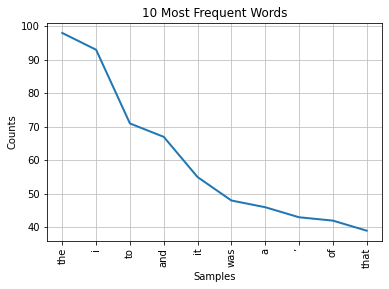

In [327]:
# Plot
def words_most_frequents_words(fdist):
    fdist.plot(10, cumulative = False, title = '10 Most Frequent Words'); plt.show()

words_most_frequents_words(fdist)

In [328]:
# Regex words

words_regex = regexp_tokenize(speech, "[\w']+")
words_regex[:10]

['i', 'am', 'honored', 'to', 'be', 'with', 'you', 'today', 'at', 'your']

In [329]:
# Words Frquency

fdist_regex = FreqDist(words_regex)
print(fdist_regex, '\n', fdist_regex.most_common(10))

<FreqDist with 702 samples and 2290 outcomes> 
 [('the', 98), ('i', 93), ('to', 71), ('and', 67), ('it', 55), ('was', 48), ('a', 46), ('of', 42), ('that', 39), ('you', 35)]


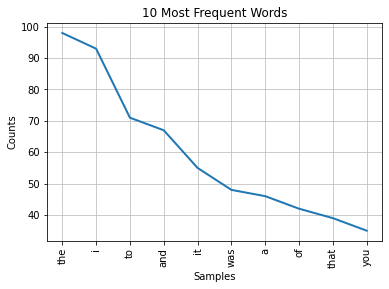

In [330]:
# Plot
words_most_frequents_words(fdist_regex)

## **EXERCISE 3**

**STATEMENT** Remove the stop words and stemming your dataset.

#### **STOPWORDS**

Stopwords considered as noise in the text. Text may contain stop words such as is, am, are, this, a, an, the, etc.

In [331]:
stop_words = set(stopwords.words('english'))
print(stop_words)

{"shouldn't", 'nor', 'about', 'all', 'most', 'needn', 'yours', 'a', 'both', 'just', 'don', 'she', 'be', "you've", 'some', 'own', 'of', 'off', 'haven', 'has', 'they', 'ours', 'been', 'from', 'up', 'the', 'other', 'over', 've', "hasn't", "shan't", 'these', "it's", 'he', 'when', 'against', 'any', 'those', 'm', 'have', "couldn't", 'it', "mustn't", 'down', 'can', 'to', 'with', 'same', 'd', 're', "that'll", 's', 'will', 'or', 'further', 'more', 'out', 't', 'until', 'very', 'himself', 'doesn', 'wouldn', 'why', 'are', 'their', 'above', 'which', "wasn't", 'here', 'its', 'as', 'being', "needn't", 'myself', 'once', 'hadn', 'but', 'y', 'were', 'because', 'couldn', 'does', 'herself', 'we', 'between', "you're", 'too', 'you', 'our', "don't", 'them', 'for', 'her', 'yourselves', 'itself', "she's", 'that', 'having', "should've", 'had', 'an', "isn't", 'ourselves', 'only', 'my', 'him', "you'd", 'was', 'few', 'what', 'whom', 'under', 'each', 'who', 'should', 'themselves', 'o', 'ain', "haven't", 'is', 'and'

In [332]:
# Removing Stopwords

def removing_stop_words(words_regex):

    global filtered_words
    filtered_words = []

    for word in words_regex:
        if word not in stop_words:
            filtered_words.append(word)

    print('Tokenized Words', words_regex[:10], '\n')
    print('Filtered Words', filtered_words[:10])


In [333]:
removing_stop_words(words_regex)

Tokenized Words ['i', 'am', 'honored', 'to', 'be', 'with', 'you', 'today', 'at', 'your'] 

Filtered Words ['honored', 'today', 'commencement', 'one', 'finest', 'universities', 'world', 'never', 'graduated', 'college']


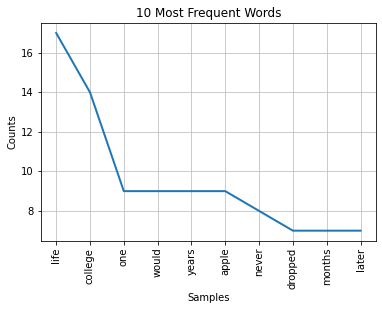

In [334]:
# Frequency of the words with stopwords

fdist_stopwords = FreqDist(filtered_words)
words_most_frequents_words(fdist_stopwords)

#### **STEMMING**

Stemming is a process of linguistic normalization, which reduces words to their word root word or chops off the derivational affixes.

In [335]:
# Stemming

def stemming_words(filtered_words):

    global stemmed_words
    porter_stemer = PorterStemmer()

    stemmed_words = []
    for word in filtered_words:
        stemmed_words.append(porter_stemer.stem(word))

    print('Filtered Words: ', filtered_words[:10])
    print('Stemmed Words: ', stemmed_words[:10])
    

In [336]:
stemming_words(filtered_words)

Filtered Words:  ['honored', 'today', 'commencement', 'one', 'finest', 'universities', 'world', 'never', 'graduated', 'college']
Stemmed Words:  ['honor', 'today', 'commenc', 'one', 'finest', 'univers', 'world', 'never', 'graduat', 'colleg']


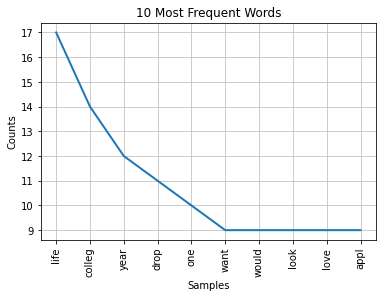

In [337]:
# Frequency of the words with Stemming

fdist_stemming = FreqDist(stemmed_words)
words_most_frequents_words(fdist_stemming)

#### **LEMMATIZATION**

Lemmatization reduces words to their base word, which is linguistically correct lemmas. It transforms root word with the use of vocabulary and morphological analysis.

Lemmatization is usually more sophisticated than stemming. Stemmer works on an individual word without knowledge of the context. For example, The word "better" has "good" as its lemma. This thing will miss by stemming because it requires a dictionary look-up.

In [338]:
# Lemmatization

def lemmatization_words(filtered_words, stemmed_words):

    global lemma_words
    lemmatization = WordNetLemmatizer()

    lemma_words = []
    for word in filtered_words:
        lemma_words.append(lemmatization.lemmatize(word, 'v'))
    
    print('Filtered Words: ', filtered_words[:10], '\n')
    print('Stemmed Words: ', stemmed_words[:10], '\n')
    print('Lemmatized Words: ', lemma_words[:10])


In [339]:
lemmatization_words(filtered_words, stemmed_words)

Filtered Words:  ['honored', 'today', 'commencement', 'one', 'finest', 'universities', 'world', 'never', 'graduated', 'college'] 

Stemmed Words:  ['honor', 'today', 'commenc', 'one', 'finest', 'univers', 'world', 'never', 'graduat', 'colleg'] 

Lemmatized Words:  ['honor', 'today', 'commencement', 'one', 'finest', 'universities', 'world', 'never', 'graduate', 'college']


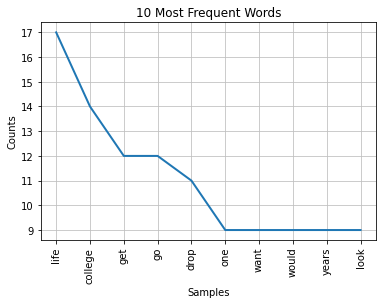

In [340]:
# Frequency of the words with Lemmatization

fdist_lemmatization = FreqDist(lemma_words)
words_most_frequents_words(fdist_lemmatization)

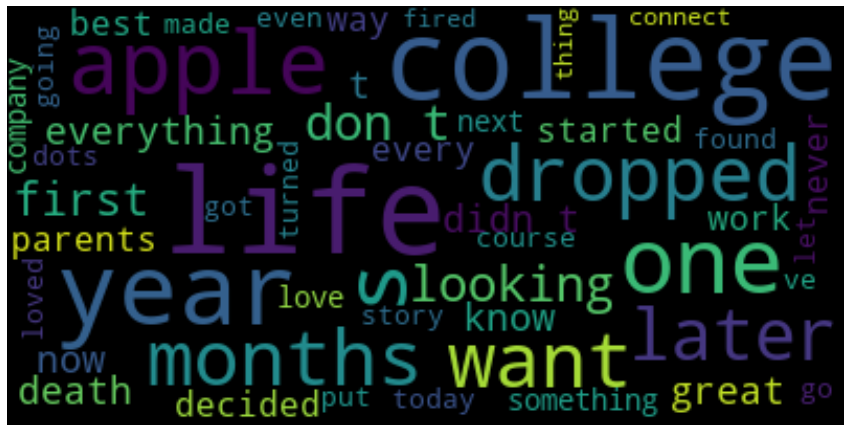

In [341]:
# WordCloud

wordcloud = WordCloud(max_words=50).generate(speech)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off'); plt.show()

## **EXERCISE 4**

**STATEMENT** Perform **Sentiment Analysis** on your dataset.

OUR DATA IS NOT STRUCTURED IN A WAY IN WHICH WE CAN MAKE A QUICK SENTIMENT ANALYSIS, SO WE WILL USE A DATASET OF AMAZON FOOD REVIEWS WITH THEIR RESPECTIVE COMMENTS THAT WILL ALLOW US TO DEVELOP THE SENTIMENT ANALYSIS.

**LINK** https://www.kaggle.com/snap/amazon-fine-food-reviews?select=Reviews.csv

### **MACHINE LEARNING CLASSIFICATION MODEL**

In [342]:
# CSV
food_reviews = pd.read_csv('./Reviews.csv')
food_reviews.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...  
3         Cough Medicine  If you are looking for the secret ingredient i...  
4            Great taffy  Great taffy at a great price.  There was a wid...

WE ARE INTERESTED IN THE VARIABLES:

> **TEXT:** This variable contains the complete product revision information.

> **SUMMARY:** This is a summary of the entire review.

> **SCORE:** The product rating provided by the customer.

In [343]:
# Plot Score's variable

fig = px.histogram(food_reviews, x = 'Score')
fig.update_traces(marker_color = 'lightpink', marker_line_color = 'magenta', marker_line_width = 1.5)
fig.update_layout(title_text = 'Product Score')
fig.show()

MOST OF THE SCORES ARE VERY POSITIVE, THAT LEADS US TO THINK THAT THE REVIEWS ARE ALSO.

WE ARE GOING TO CLASSIFY THE REVIEWS AS POSITIVE OR NEGATIVE AND THEN USE THESE NUMERICAL DATA IN THE MODEL. POSITIVE REVIEWS ARE CLASSIFIED AS +1 AND NEGATIVE REVIEWS AS -1.

+ FROM A SCORE > 3 WE WILL CLASSIFY THE REVIEW AS POSITIVE (+1)

+ FROM A SOCRE < 3 WE WILL CLASSIFY THE REVIEW AS NEGATIVE (-1)

+ THE REVIEW WITH A SCORE = 3 WE WILL ELIMINATE IT, SINCE WE CONSIDER THEM NEUTRAL.

In [344]:
# Review Classification

food_reviews = food_reviews[food_reviews['Score'] != 3] # Remove score = 3
food_reviews['sentiment'] = food_reviews['Score'].apply(lambda rate: +1 if rate >3 else -1)
food_reviews.head(2)

Id   ProductId          UserId ProfileName  HelpfulnessNumerator  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW  delmartian                     1   
1   2  B00813GRG4  A1D87F6ZCVE5NK      dll pa                     0   

   HelpfulnessDenominator  Score        Time                Summary  \
0                       1      5  1303862400  Good Quality Dog Food   
1                       0      1  1346976000      Not as Advertised   

                                                Text  sentiment  
0  I have bought several of the Vitality canned d...          1  
1  Product arrived labeled as Jumbo Salted Peanut...         -1

#### **BUILD THE MODEL**

WE WANT TO CREATE A **CLASSIFICATION MODEL**. THE TARGET VARIABLE IS TO CLASSIFY A REVIEW ('SUMMARY') AS POSITIVE OR NEGATIVE. THE PREDICTOR VARIABLE WILL BE THE 'SUMMARY'.

##### **DATA CLEANING**

In [345]:
# Create a function that let us delate the punctuations

def remove_punctuation(text):
    final = ''.join(sentence for sentence in text if sentence not in ('?','.',';',':','!','"'))

    return final
    
food_reviews['Text'] = food_reviews['Text'].apply(remove_punctuation)
food_reviews = food_reviews.dropna(subset = ['Summary'])
food_reviews['Summary'] = food_reviews['Summary'].apply(remove_punctuation)

##### **SPLIT THE DATAFRAME**

THE DATAFRAME MUST ONLY HAVE TWO COLUMNS: ['SUMMARY' , 'SENTIMENT']

In [346]:
# New dataset
small_food_reviews = food_reviews[['Summary', 'sentiment']]
small_food_reviews.head()

Summary  sentiment
0  Good Quality Dog Food          1
1      Not as Advertised         -1
2    Delight says it all          1
3         Cough Medicine         -1
4            Great taffy          1

In [347]:
# Split the data

index = food_reviews.index
food_reviews['random_number'] = np.random.randn(len(index))

train = food_reviews[food_reviews['random_number'] <= 0.8]
test = food_reviews[food_reviews['random_number'] > 0.8]

print('Train Data: ', round(len(train)/len(index)*100,2), '\n', 'Test Data: ', round(len(test)/len(index)*100,2))

Train Data:  78.82 
 Test Data:  21.18


##### **BAG OF WORDS**

THE BAG OF WORDS WILL TRANSFORM THE TEXT IN OUR DATAFRAME INTO A BAG-OG-WORDS MODEL, WHICH WILL CONTAIN A SPARSE ARRAY OF INTEGERS. THE NUMBER OF OCCURRENCES OF EACH WORD WILL BE COUNTED AND PRINTED.

In [348]:
# Vectorizer

vectorizer = CountVectorizer(token_pattern= r'\b\w+\b')

train_matrix = vectorizer.fit_transform(train['Summary'])
test_matrix = vectorizer.transform(test['Summary'])

##### **FIT THE MODEL**

In [349]:
# Logistic Regression

# Object
logistic_regression = LogisticRegression(max_iter= 500)

# Split Predictor and Target variables
X_train = train_matrix
X_test = test_matrix
y_train = train['sentiment']
y_test = test['sentiment']

# Fit the model
logistic_regression.fit(X_train, y_train)

LogisticRegression(max_iter=500)

##### **PREDICTIONS**

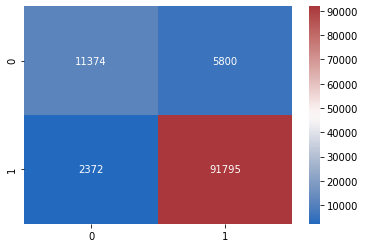

              precision    recall  f1-score   support

          -1       0.83      0.66      0.74     17174
           1       0.94      0.97      0.96     94167

    accuracy                           0.93    111341
   macro avg       0.88      0.82      0.85    111341
weighted avg       0.92      0.93      0.92    111341



In [350]:
predictions = logistic_regression.predict(X_test)

# Testing the model

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot = True, cmap =sns.color_palette("vlag", as_cmap=True), fmt = 'd'); plt.show()

# Classification Report
print(classification_report(y_test, predictions))

**CONCLUSION:** THE OVERALL ACCURACY OF THE MODEL ON THE TEST DATA IS AROUND 93%, WHICH IS PRETTY GOOD CONSIDERING WE DIDN'T DO ANY FEATURE EXTRACTION OR MUCH PRE-PROCESSING.

### **SENTIMENT OF TEXT**

GIVEN A TEXT WE CAN COUNT THE NUMBER OF 'POSITIVE' AND 'NEGATIVE' WORDS

**LINK:** https://towardsdatascience.com/sentimental-analysis-using-vader-a3415fef7664

In [351]:
# Steve Jobs's Speech

# Object
sentimental_analyzer = SentimentIntensityAnalyzer()

sentimental_analyzer.polarity_scores(speech)


{'neg': 0.091, 'neu': 0.746, 'pos': 0.162, 'compound': 0.9996}

WE CAN SEE HOW STEVE JOBS'S SPEECH, DESPITE SAYING MANY NEUTRAL WORDS OF THE LANGUAGE, MAKES A POSITIVE SPEECH IN FRONT OF HUNDREDS OF LISTENERS.

In [352]:
# Food Reviews

food_reviews_sentiment_analyzer = food_reviews[['Summary', 'Text', 'sentiment']]
food_reviews_sentiment_analyzer.head()

Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of the Vitality canned d...   
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...   
2    Delight says it all  This is a confection that has been around a fe...   
3         Cough Medicine  If you are looking for the secret ingredient i...   
4            Great taffy  Great taffy at a great price  There was a wide...   

   sentiment  
0          1  
1         -1  
2          1  
3         -1  
4          1

In [353]:
# Adding scores of polarity

food_reviews_sentiment_analyzer = food_reviews_sentiment_analyzer.sample(n = 5000, random_state = 42)
food_reviews_sentiment_analyzer['scores'] = food_reviews_sentiment_analyzer['Text'].apply(lambda text: sentimental_analyzer.polarity_scores(text))
food_reviews_sentiment_analyzer.head()

Summary  \
395257                   CHECK THE SUGAR   
434013                     Great Product   
49485                   This stuff rocks   
428500                  community coffee   
48091   Not my favorite but good for you   

                                                     Text  sentiment  \
395257  I would check the sugar grams before you buy a...         -1   
434013  Like another reviewer (Purple Cloud) I've been...          1   
49485   Wow A product that is EXACTLY what the label s...          1   
428500  the best coffee in the world Very good and def...          1   
48091   Not sure if I would buy this again- Didn't rea...          1   

                                                   scores  
395257  {'neg': 0.0, 'neu': 0.797, 'pos': 0.203, 'comp...  
434013  {'neg': 0.02, 'neu': 0.816, 'pos': 0.163, 'com...  
49485   {'neg': 0.137, 'neu': 0.66, 'pos': 0.203, 'com...  
428500  {'neg': 0.108, 'neu': 0.567, 'pos': 0.325, 'co...  
48091   {'neg': 0.14, 'neu': 0.619, 'pos': 0.241, 'com...

WE HAVE ADDED A SENTIMENTAL ANALYZE TO EACH OBSERVATION TO ASSESS IN MORE DETAIL THE POSITIVITY/NEGATIVITY OF THE CUSTOMER'S REVIEW

NOW WE WILL CALL OUT COMPOUND AS A SEPARATE COLUMN AND ALL VALUES GREAER THAN ZEROS WILL BE CONSIDERED A POSITIVE REVIEW AND ALL VALUES LESS THAN ZERO WOULD BE CONSIDERED AS A NEGATIVE REVIEW.

In [354]:
# Extract 'COMPOUND'

food_reviews_sentiment_analyzer['compound'] = food_reviews_sentiment_analyzer['scores'].apply(lambda compound: compound['compound'])
food_reviews_sentiment_analyzer.head(2)

Summary                                               Text  \
395257  CHECK THE SUGAR  I would check the sugar grams before you buy a...   
434013    Great Product  Like another reviewer (Purple Cloud) I've been...   

        sentiment                                             scores  compound  
395257         -1  {'neg': 0.0, 'neu': 0.797, 'pos': 0.203, 'comp...    0.9360  
434013          1  {'neg': 0.02, 'neu': 0.816, 'pos': 0.163, 'com...    0.9936

In [355]:
# Positive or Negative Review

food_reviews_sentiment_analyzer['comp_score'] = food_reviews_sentiment_analyzer['compound'].apply(lambda compound: 'POSITIVE'if compound >=0 else 'NEGATIVE')
food_reviews_sentiment_analyzer.head(2)

Summary                                               Text  \
395257  CHECK THE SUGAR  I would check the sugar grams before you buy a...   
434013    Great Product  Like another reviewer (Purple Cloud) I've been...   

        sentiment                                             scores  \
395257         -1  {'neg': 0.0, 'neu': 0.797, 'pos': 0.203, 'comp...   
434013          1  {'neg': 0.02, 'neu': 0.816, 'pos': 0.163, 'com...   

        compound comp_score  
395257    0.9360   POSITIVE  
434013    0.9936   POSITIVE